# Wine Quality Prediction Project

## Project Overview
This project predicts wine quality using a Decision Tree classifier with fuzzy features.

## Dataset
The dataset consists of two CSV files:
- winequality-white.csv
- winequality-red.csv

Each file contains physicochemical properties of wine samples and their quality ratings.

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import os

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True


## 2. Load and Explore Data

In [2]:
# Load datasets
data_dir = 'wine+quality'
white_wine = pd.read_csv(os.path.join(data_dir, 'winequality-white.csv'), sep=';')
red_wine = pd.read_csv(os.path.join(data_dir, 'winequality-red.csv'), sep=';')

# Add type column
white_wine['type'] = 'white'
red_wine['type'] = 'red'

# Combine datasets
df = pd.concat([white_wine, red_wine], ignore_index=True)

# Convert type to numeric
df['type'] = df['type'].map({'white': 0, 'red': 1})

# Display basic information
print('Dataset Shape:', df.shape)
print('First 5 rows:')
display(df.head())
print('Basic statistics:')
display(df.describe())

Dataset Shape: (6497, 13)
First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


Basic statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


## 3. Data Cleaning

In [3]:
print('Missing values:')
print(df.isnull().sum())
print('Duplicates:')
print(df.duplicated().sum())
# Remove duplicates if any
df = df.drop_duplicates()
print('New shape after removing duplicates:', df.shape)

Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64
Duplicates:
1177
New shape after removing duplicates: (5320, 13)


## 4. Exploratory Data Analysis

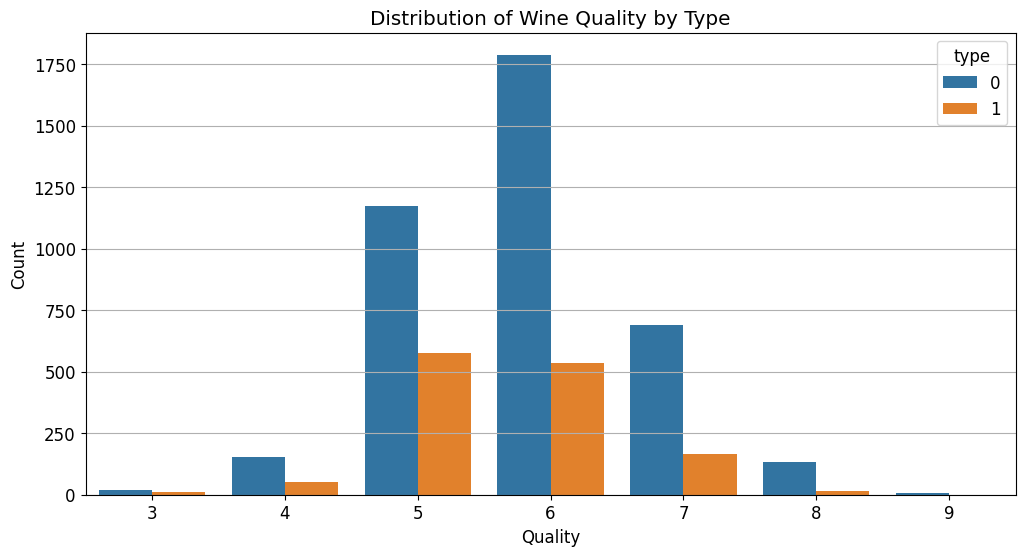

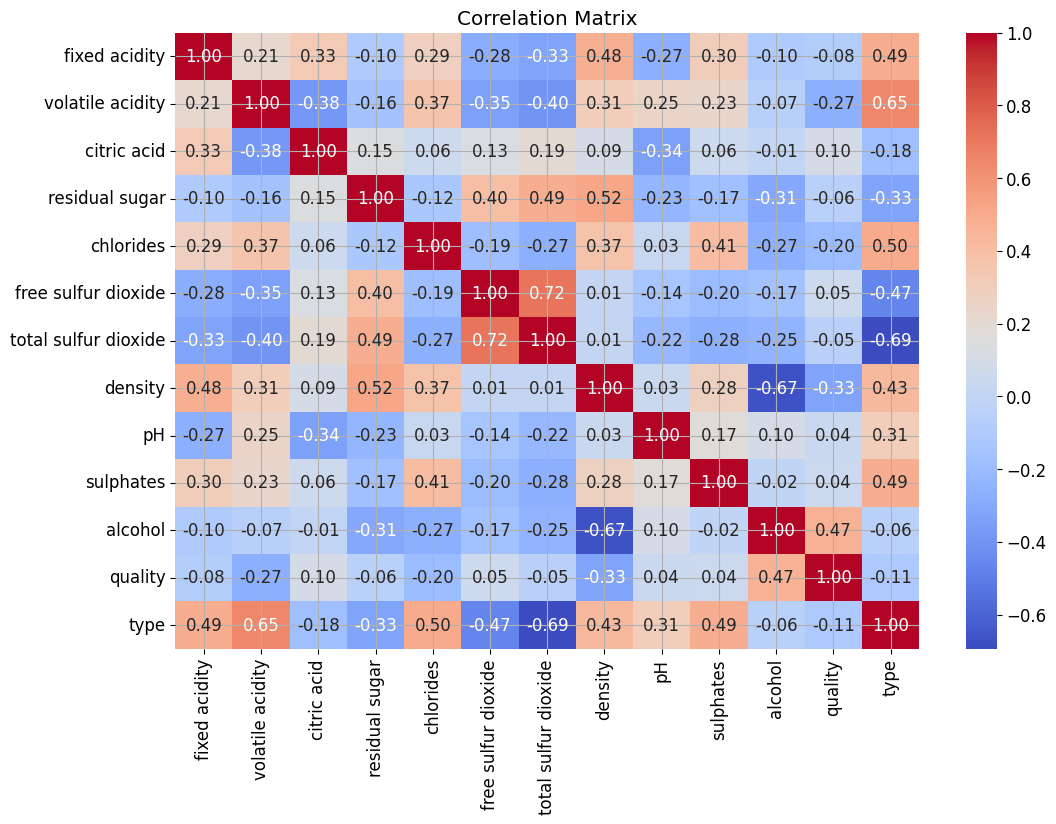

In [4]:
# Distribution of wine quality
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='quality', hue='type')
plt.title('Distribution of Wine Quality by Type')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 5. Data Preprocessing

In [5]:
# Split features and target
X = df.drop(['quality', 'type'], axis=1)
y = df['quality']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Data shapes:')
print('Training features:', X_train_scaled.shape)
print('Training labels:', y_train.shape)
print('Test features:', X_test_scaled.shape)
print('Test labels:', y_test.shape)

Data shapes:
Training features: (4256, 11)
Training labels: (4256,)
Test features: (1064, 11)
Test labels: (1064,)


## 6. Create Fuzzy Features

In [6]:
def triangular_membership(x, a, b, c):
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

# Create fuzzy features for selected numeric features
fuzzy_features = []
for feature in ['alcohol', 'sulphates']:
    idx = X.columns.get_loc(feature)
    low = triangular_membership(X_train_scaled[:, idx], 0, 0.33, 0.66)
    medium = triangular_membership(X_train_scaled[:, idx], 0.33, 0.66, 0.99)
    high = triangular_membership(X_train_scaled[:, idx], 0.66, 0.99, 1)
    fuzzy_features.extend([low, medium, high])

# Add fuzzy features to training data
X_train_fuzzy = np.column_stack([X_train_scaled] + fuzzy_features)
print('Training features with fuzzy:', X_train_fuzzy.shape)

Training features with fuzzy: (4256, 17)


## 7. Decision Tree Training

In [7]:
def hill_climbing_search(X_train, y_train, max_depth_range=10):
    best_depth = 1
    best_score = 0
    current_depth = 1
    while current_depth <= max_depth_range:
        model = DecisionTreeClassifier(max_depth=current_depth, random_state=42)
        model.fit(X_train, y_train)
        score = model.score(X_train, y_train)
        if score > best_score:
            best_score = score
            best_depth = current_depth
        else:
            break
        current_depth += 1
    return best_depth, best_score

# Find optimal depth using hill climbing
best_depth, best_score = hill_climbing_search(X_train_fuzzy, y_train)
print('Best depth:', best_depth, 'Best score:', round(best_score, 4))

Best depth: 10 Best score: 0.7592


## 8. Model Evaluation

In [8]:
# Train final model with best depth
final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_model.fit(X_train_fuzzy, y_train)

# Prepare test set with fuzzy features
fuzzy_features_test = []
for feature in ['alcohol', 'sulphates']:
    idx = X.columns.get_loc(feature)
    low = triangular_membership(X_test_scaled[:, idx], 0, 0.33, 0.66)
    medium = triangular_membership(X_test_scaled[:, idx], 0.33, 0.66, 0.99)
    high = triangular_membership(X_test_scaled[:, idx], 0.66, 0.99, 1)
    fuzzy_features_test.extend([low, medium, high])
X_test_fuzzy = np.column_stack([X_test_scaled] + fuzzy_features_test)

# Predict on test set
y_pred = final_model.predict(X_test_fuzzy)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print('Metrics:')
print('Accuracy:', round(accuracy, 4))
print('Precision:', round(precision, 4))
print('Recall:', round(recall, 4))
print('Confusion Matrix:')
print(conf_matrix)

Metrics:
Accuracy: 0.5
Precision: 0.4791
Recall: 0.5
Confusion Matrix:
[[  0   1   2   1   1   0   0]
 [  0   3  24  10   4   0   0]
 [  2  13 204 125  12   1   0]
 [  0   2 124 265  57   5   0]
 [  1   3  21  85  59   4   0]
 [  0   1   4  20   8   1   0]
 [  0   0   0   1   0   0   0]]


/Users/macbook/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 9. Visualize Decision Tree

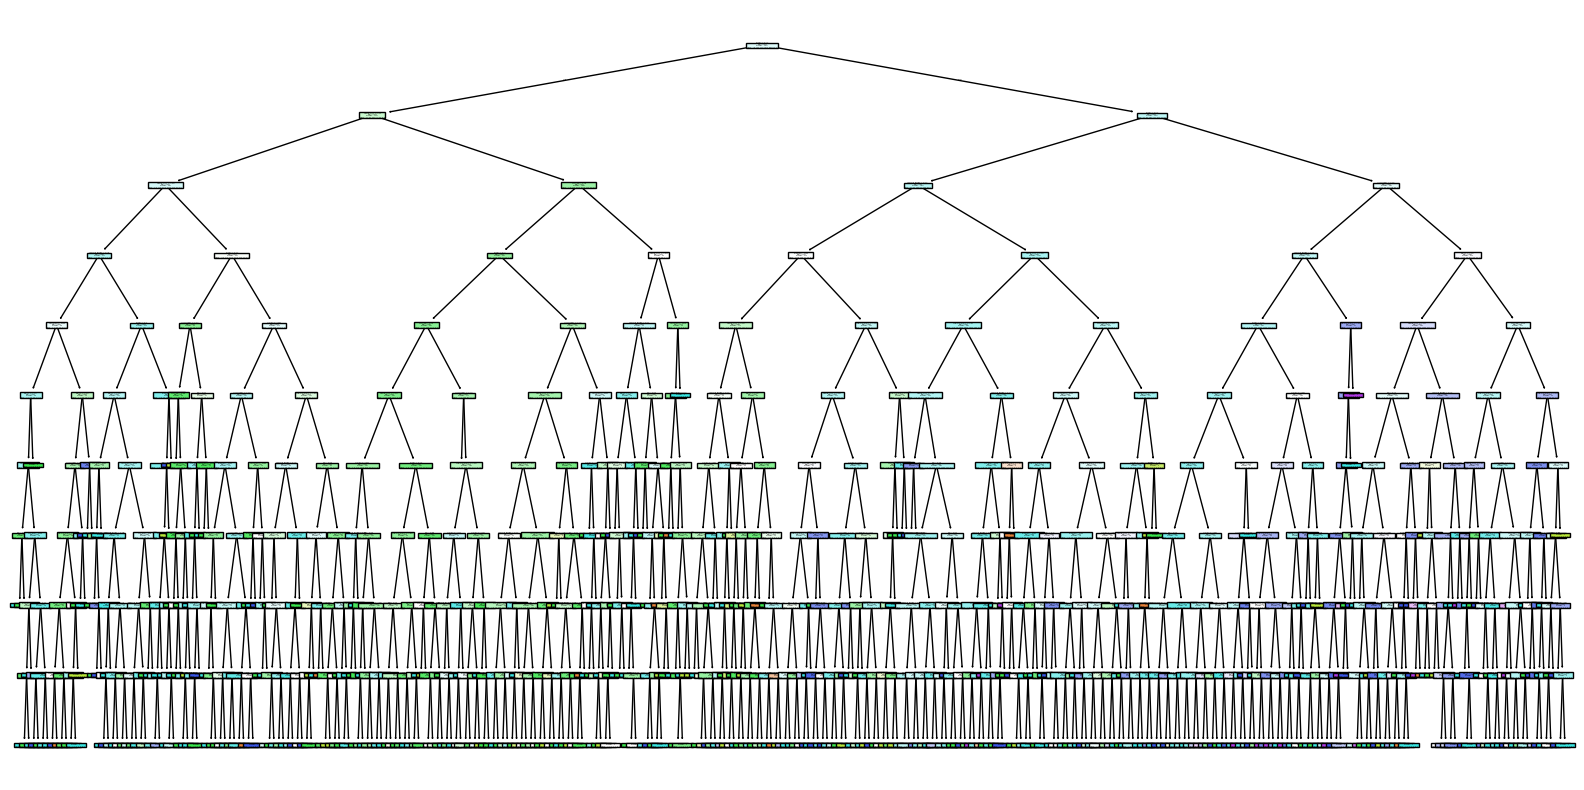

In [9]:
plt.figure(figsize=(20, 10))
plot_tree(final_model, filled=True, feature_names=X.columns.tolist() + ['fuzzy_low', 'fuzzy_medium', 'fuzzy_high']*2)
plt.show()